In [213]:
import os
import pandas as pd
import numpy as np
from utils.Settings import Setting
from utils.ProjectPath import ProjectPath
import ChartDrawer
from ChartDrawer import MultiLineChart
from sql.DataQuerier import DataQuerier
path = ProjectPath()
setting = Setting()

uni_sql_querier = DataQuerier("univ2")
pan_sql_querier = DataQuerier("panv2")


ENVIRONMENT VARIABLES
DATA PATH: /mnt/Storage/Data/Blockchain/DEX


### **GENERAL ANALYSIS**

#### **1. SCAM ANALYSIS**

In [214]:

def general_statistic(dex="univ2"):
    scammer_dataset = pd.read_csv(os.path.join(eval(f"path.{dex}_processed_path"), "filtered_simple_rp_scammers.csv"))
    pools = pd.read_csv(os.path.join(eval(f"path.{dex}_processed_path"), "pool_addresses.csv"))
    scams_by_scammer = scammer_dataset.groupby("scammer")
    print("+ Number of pools:", len(pools.pool.unique()))
    print("+ Number of scams:", len(scammer_dataset.pool.unique()), f"({round(len(scammer_dataset.pool.unique())/ len(pools.pool.unique())*100, 3)})%")
    print("+ Number of scammers:", len(scammer_dataset.scammer.unique()))
    print("+ Scams by scammers:")
    scams_by_scammer_count = scams_by_scammer.scammer.count().reset_index(name='num_scam')
    display(scams_by_scammer_count.sort_values(['num_scam'], ascending=False).head(10))
    print("+ Scams by scammers stats:")
    more_than_one_count = len(scams_by_scammer_count[scams_by_scammer_count["num_scam"] > 1])
    print("\tScammers conducted more than 1 scam: ",f"{more_than_one_count} ({round(more_than_one_count/ len(scams_by_scammer_count)* 100, 3) }%)")
    display(scams_by_scammer_count.describe())

In [215]:
# def get_related_scammer_from_pool_events(querier, pool_address, scammers):
#     pool_transfers = querier.get_pool_transfer(pool_address)
#     pool_swaps = querier.get_pool_swap(pool_address)
#     connected_scammer = set()
#     for transfer in pool_transfers:
#         if transfer.sender.lower() in scammers:
#             connected_scammer.add(transfer.sender.lower())
#         if transfer.receiver.lower() in scammers:
#             connected_scammer.add(transfer.receiver.lower())
#     for swap in pool_swaps:
#         if swap.sender.lower() in scammers:
#             connected_scammer.add(swap.sender.lower())
#         if swap.receiver.lower().lower() in scammers:
#             connected_scammer.add(swap.receiver.lower())
#     # print(f"FOUND {len(connected_scammer)} SCAM INVESTOR FROM POOL {pool_address}")
#     return connected_scammer
#
# def extend_scammer_set(dex="univ2"):
#     sql_querier = DataQuerier(dex)
#     scammer_dataset = pd.read_csv(os.path.join(eval(f"path.{dex}_processed_path"), "filtered_simple_rp_scammers.csv"))
#     scammer_dataset["role"] = "provider"
#     scammer_dict = scammer_dataset.to_dict("records")
#     scam_pools = scammer_dataset.pool.str.lower().values
#     scammers = scammer_dataset.scammer.str.lower().values
#     for pool in scam_pools:
#         wash_traders = get_related_scammer_from_pool_events(sql_querier, pool, scammers)
#         for wash_trader in wash_traders:
#             scammer_dict.append({
#                 "pool": pool,
#                 "scammer": wash_trader,
#                 "role": "washtrader",
#             })
#     extend_df = pd.DataFrame(scammer_dict)
#     display(extend_df)
#
# extend_scammer_set()

#### **1.1 Uniswap**

In [216]:
general_statistic("univ2")


+ Number of pools: 356296
+ Number of scams: 161329 (45.279)%
+ Number of scammers: 145654
+ Scams by scammers:


,scammer,num_scam
135787,0xee80ba78889acf579b6a8d503470b4a67cf77076,162
132271,0xe85740d4b34f727e8cbc9d676d253a4fd736a239,156
25310,0x2c1eb6ca34997f6601cffe791831ad6d5cb9e937,150
56168,0x62e1922e4322f3026f5b47de1f9fe18082106b4e,126
85152,0x95b0566ff14437f18fa310a621efd9b496b21c29,84
107603,0xbcfb4020d13e2057448881184781e533b987bb5b,83
83623,0x931202cfd535f8fa02f6e93c69dfdba53508ae4b,83
24738,0x2b2fb89d7b71d89013fd6f91338ab69e34896edf,80
58616,0x672282b10a397993dfab4a4fb08c333fa2118538,69
20845,0x247545543fa5a6993ccd6085a5ca0805fbbea258,67


+ Scams by scammers stats:
	Scammers conducted more than 1 scam:  6748 (4.633%)


,num_scam
count,145654.000000
mean,1.127803
std,1.510969
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,162.000000


#### **1.2 Pancakeswap**

In [217]:
general_statistic("panv2")

+ Number of pools: 1694059
+ Number of scams: 470555 (27.777)%
+ Number of scammers: 238280
+ Scams by scammers:


,scammer,num_scam
89630,0x608756c184a0723077b0c10f97f4d054c9ee1c0f,18434
200863,0xd7a4e1ee98aab8abdd6c16fa1f4e6e342925ffd6,7812
124922,0x863a9cefe0cca77d6a57945ef57b6c821fe090aa,2619
42430,0x2de6ee4f67e7a9fc15409a2b5395f16652d3ee11,2593
139573,0x95b0566ff14437f18fa310a621efd9b496b21c29,2330
1744,0x01c6c2775e16a66c882152ce56096ef4489dc7e3,2145
136691,0x92b6a03b90ff9d7bedc59aa0675746159792dcfd,1860
54469,0x3a9946dda27c623b4cf4878d5d550bda72a522fe,1825
119352,0x80464ebfdca210ea3ff3e667e6b26b5f76c526f9,1698
24415,0x1a572ca37ca8ed76ded83ff6dfcad83a6e61abbc,1205


+ Scams by scammers stats:
	Scammers conducted more than 1 scam:  45366 (19.039%)


,num_scam
count,238280.000000
mean,2.019162
std,43.485363
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,18434.000000


### **CLUSTER ANALYSIS**

In [218]:
uni_cluster_path = os.path.join(path.univ2_processed_path, "sql_scammer_group.csv")
uni_cluster_data = pd.read_csv(uni_cluster_path)

pan_cluster_path = os.path.join(path.panv2_processed_path, "sql_scammer_group.csv")
pan_cluster_data = pd.read_csv(pan_cluster_path)

#### **1. Uniswap clusters**


In [219]:
print("+ Number of unique scammers:", len(uni_cluster_data.scammer.unique()))
print("+ Number of unique clusters:", len(uni_cluster_data.group_id.unique()))
uni_clusters = uni_cluster_data.groupby("group_id")
print("+ The largest groups:", np.max(uni_clusters.size()))
print("+ The smallest groups:", np.min(uni_clusters.size()))
cluster_counts = uni_clusters.scammer.count().reset_index(name='num_scammer').sort_values(['num_scammer'], ascending=False)
print("+ Top 10 largest groups:")
display(cluster_counts.head(10))

print("+ Cluster descriptions:")
display(cluster_counts.describe())

+ Number of unique scammers: 145654
+ Number of unique clusters: 91458
+ The largest groups: 39741
+ The smallest groups: 1
+ Top 10 largest groups:


,group_id,num_scammer
4,5,39741
603,604,163
255,256,155
2562,2563,93
832,833,70
5398,5399,66
949,950,63
1041,1042,58
94,95,50
4365,4366,47


+ Cluster descriptions:


,group_id,num_scammer
count,91458.000000,91458.000000
mean,45729.500000,1.592578
std,26401.794797,131.412861
min,1.000000,1.000000
25%,22865.250000,1.000000
50%,45729.500000,1.000000
75%,68593.750000,1.000000
max,91458.000000,39741.000000


#### **2. Pancakeswap clusters**

In [220]:
print("+ Number of unique scammers:", len(pan_cluster_data.scammer.unique()))
print("+ Number of unique clusters:", len(pan_cluster_data.group_id.unique()))
pan_clusters = pan_cluster_data.groupby("group_id")
print("+ The largest groups:", np.max(pan_clusters.size()))
print("+ The smallest groups:", np.min(pan_clusters.size()))
cluster_counts = pan_clusters.scammer.count().reset_index(name='num_scammer').sort_values(['num_scammer'], ascending=False)
print("+ Top 10 largest groups:")
display(cluster_counts.head(10))

print("+ Cluster descriptions:")
display(cluster_counts.describe())

+ Number of unique scammers: 238280
+ Number of unique clusters: 93420
+ The largest groups: 127208
+ The smallest groups: 1
+ Top 10 largest groups:


,group_id,num_scammer
1,2,127208
980,981,115
2602,2603,52
3413,3414,45
675,676,42
1564,1565,37
1245,1246,36
94,95,36
216,217,35
1672,1673,31


+ Cluster descriptions:


,group_id,num_scammer
count,93420.000000,93420.000000
mean,46710.500000,2.550632
std,26968.175411,416.190122
min,1.000000,1.000000
25%,23355.750000,1.000000
50%,46710.500000,1.000000
75%,70065.250000,1.000000
max,93420.000000,127208.000000


### **CLUSTER AWARE PROFIT**

#### **1. Uniswap cluster aware profit**

In [221]:
uni_profit_path= os.path.join(path.univ2_processed_path, "cluster_awareness_profit.csv")
uni_profit_data = pd.read_csv(uni_profit_path)
print("+ Sample data")
display(uni_profit_data.head(10))

+ Sample data


,group_id,pool_address,y_revenue,x_cost,z_wash_trade,naive_profit,true_profit
0,1,0x0000871c95bb027c90089f4926fd1ba82cdd9a8b,10.692309,7.915779,0.000000,2.776531,2.776531
1,2,0x0000b693708a0967a3014365a51282c4d189cd24,1.119145,0.845394,0.000000,0.273751,0.273751
2,3,0x0002bc7093aefd17032b5f9e9c2237e83ddba267,1.228465,1.015522,0.000000,0.212944,0.212944
3,4,0x0002bc7e2db8df0f26b6db17e1f5e661cb07ebcb,2.833391,2.823368,0.000000,0.010023,0.010023
4,5,0xfadad8a9ba08f76609c8fdc9118d33bda0ec79ad,14.697503,7.156440,0.000000,7.541063,7.541063
5,5,0x718df9a9d5f2f0974a2df66088b5b5f542d96314,2.052231,1.139866,0.489615,0.912365,0.422750
6,5,0xebfc2f2e888639cc3bfbe58e1b3e687ff437bdf5,12.286598,1.061587,7.394474,11.225011,3.830536
7,5,0x719c456ec9917aeeaaea0517a1e9f997f0b766bb,3.231436,1.106501,0.025717,2.124935,2.099219
8,5,0xb2dfe396a5de592f342e8ca117acf041b9a30560,1.251710,1.247088,0.021025,0.004622,-0.016403
9,5,0xf1c7856767f7d6e692ebc99d072e389d2da68895,8.045559,1.276744,0.000000,6.768815,6.768815


##### **1.1 Cluster level stats**

In [222]:
uni_profit_clusters = uni_profit_data[uni_profit_data.y_revenue>0].groupby("group_id")
cluster_statistics = []
for name, data in uni_profit_clusters:
     true_profits = data['true_profit']
     naive_profits = data['naive_profit']
     cluster_statistics.append({
        "cluster_id": name,
        "number_of_scams": len(data),
        "avg_true_profit": np.average(true_profits),
        "avg_naive_profit": np.average(naive_profits),
        "median_true_profit": true_profits.median(),
        "median_naive_profit": naive_profits.median(),
        "total_true_profit": true_profits.sum(),
        "total_naive_profit": naive_profits.sum(),
        "min_true_profit": true_profits.min(),
        "min_naive_profit": naive_profits.min(),
        "max_true_profit": true_profits.max(),
        "max_naive_profit": naive_profits.max(),
        "number_positive_true_profits": len(data[data['true_profit'] > 0]),
        "number_positive_naive_profits": len(data[data['true_profit'] > 0]),
    })
display(pd.DataFrame(cluster_statistics).sort_values(['number_of_scams'], ascending=False).head(10))

,cluster_id,number_of_scams,avg_true_profit,avg_naive_profit,median_true_profit,median_naive_profit,total_true_profit,total_naive_profit,min_true_profit,min_naive_profit,max_true_profit,max_naive_profit,number_positive_true_profits,number_positive_naive_profits
4,5,51168,3.536808,5.385139,0.303075,0.822591,180971.398468,275546.795411,-531.270424,-454.228021,863.577195,866.335805,36286,36286
578,580,244,0.222158,0.231017,0.215204,0.221507,54.206617,56.368155,-0.084448,-0.021413,1.150426,1.255246,241,241
592,594,225,0.503992,0.504582,0.504059,0.504059,113.398236,113.531007,-0.197013,-0.197013,1.470277,1.470277,222,222
602,604,172,0.834054,0.854414,0.759064,0.803255,143.457300,146.959220,-0.946496,-0.946496,4.244134,4.244134,152,152
255,256,157,0.260643,0.323894,0.208838,0.287117,40.921017,50.851308,-0.208700,-0.185553,1.952298,1.957639,132,132
1693,1697,99,0.744968,0.744968,0.741404,0.741404,73.751843,73.751843,0.126350,0.126350,1.413692,1.413692,99,99
2559,2563,93,0.181712,5.894273,0.279049,6.515568,16.899224,548.167386,-0.045022,0.220301,0.340467,9.533239,64,64
25,26,84,0.259352,0.310109,1.060729,1.086423,21.785528,26.049136,-11.508033,-11.508033,8.360483,8.864223,64,64
4165,4169,80,0.062052,0.064954,0.004302,0.011121,4.964186,5.196346,-0.113404,-0.113404,0.637722,0.637722,41,41
946,950,63,0.488163,0.912518,0.015907,0.500032,30.754282,57.488618,-0.421041,-0.192355,11.782079,11.891037,33,33


##### **1.2 Pool level stats**

In [223]:
true_profits = uni_profit_data[uni_profit_data.y_revenue>0]['true_profit']
naive_profits = uni_profit_data[uni_profit_data.y_revenue>0]['naive_profit']
pool_statistics = {
        "total_pools": len(uni_profit_data),
        "avg_true_profit": np.average(true_profits),
        "avg_naive_profit": np.average(naive_profits),
        "median_true_profit": true_profits.median(),
        "median_naive_profit": naive_profits.median(),
        "total_true_profit": true_profits.sum(),
        "total_naive_profit": naive_profits.sum(),
        "min_true_profit": true_profits.min(),
        "min_naive_profit": naive_profits.min(),
        "max_true_profit": true_profits.max(),
        "max_naive_profit": naive_profits.max(),
        "number_positive_true_profits": len(uni_profit_data[uni_profit_data['true_profit'] > 0]),
        "number_positive_naive_profits": len(uni_profit_data[uni_profit_data['naive_profit'] > 0]),
    }
for k,v in pool_statistics.items():
    print("+ {}: {}".format(k, v))

+ total_pools: 161327
+ avg_true_profit: 1.9791630633187411
+ avg_naive_profit: 2.68513283573072
+ median_true_profit: 0.14052645429774047
+ median_naive_profit: 0.2304722541046476
+ total_true_profit: 319029.21082860115
+ total_naive_profit: 432827.3023227777
+ min_true_profit: -531.2704244917708
+ min_naive_profit: -454.22802062126647
+ max_true_profit: 863.577195227217
+ max_naive_profit: 1028.5834337656029
+ number_positive_true_profits: 103706
+ number_positive_naive_profits: 111494


#### **2. Pancakeswap cluster aware profit**

In [224]:
pan_profit_path= os.path.join(path.panv2_processed_path, "cluster_awareness_profit.csv")
pan_profit_data = pd.read_csv(pan_profit_path)
print("Sample data")
display(pan_profit_data.head(10))

Sample data


,group_id,pool_address,y_revenue,x_cost,z_wash_trade,naive_profit,true_profit
0,1,0x00001c2a26ab08413ef27872986ec0c0787464a4,0.018912,0.031548,0.000000,-0.012637,-0.012637
1,2,0x3ea75a5389d8a1f14ea03d94d47bb0b9b26865fd,0.000000,0.045086,0.010794,-0.045086,-0.055881
2,2,0x943283e0fd819c35556c1bea72207a0ac7434876,1.522783,1.523980,0.062886,-0.001196,-0.064082
3,2,0x8350cd6405cfb8fd97f799409c0693c914663fac,1.500432,1.540123,0.000000,-0.039691,-0.039691
4,2,0xaaf3d6abdd39eaa9982430208c3e1e92a7a138ec,1.008063,1.040118,0.000000,-0.032055,-0.032055
5,2,0xe260638b0fed2a9ee0b575a34c28a8fd78ce85f3,1.508554,1.540124,0.000000,-0.031570,-0.031570
6,2,0x0325ccb9f538c28a5ea8900e3e2fbc47160252a8,1.146576,1.039839,0.216417,0.106738,-0.109679
7,2,0xf5319516c6cff1801241e71341883bf4f4d1a1dc,1.022302,1.039839,0.001268,-0.017537,-0.018804
8,2,0xf6fe7fb58da14e0e0d1c49c985e71a5cd67c157a,0.644766,0.626008,0.000000,0.018758,0.018758
9,2,0x5c73e63676bd93099dbd16f33e0e05ebf3b46681,0.661181,0.671547,0.039303,-0.010365,-0.049668


##### **2.1 Cluster level stats**

In [225]:
pan_profit_clusters = pan_profit_data[pan_profit_data.y_revenue > 0].groupby("group_id")
cluster_statistics = []
for name, data in pan_profit_clusters:
     true_profits = data['true_profit']
     naive_profits = data['naive_profit']
     cluster_statistics.append({
        "cluster_id": name,
        "number_of_scams": len(data),
        "avg_true_profit": np.average(true_profits),
        "avg_naive_profit": np.average(naive_profits),
        "median_true_profit": true_profits.median(),
        "median_naive_profit": naive_profits.median(),
        "total_true_profit": true_profits.sum(),
        "total_naive_profit": naive_profits.sum(),
        "min_true_profit": true_profits.min(),
        "min_naive_profit": naive_profits.min(),
        "max_true_profit": true_profits.max(),
        "max_naive_profit": naive_profits.max(),
        "number_positive_true_profits": len(data[data['true_profit'] > 0]),
        "number_positive_naive_profits": len(data[data['true_profit'] > 0]),
    })
display(pd.DataFrame(cluster_statistics).sort_values(['number_of_scams'], ascending=False).head(10))

,cluster_id,number_of_scams,avg_true_profit,avg_naive_profit,median_true_profit,median_naive_profit,total_true_profit,total_naive_profit,min_true_profit,min_naive_profit,max_true_profit,max_naive_profit,number_positive_true_profits,number_positive_naive_profits
1,2,317822,2.705687,3.719272,-0.006243,0.021414,859926.704435,1.182067e+06,-717.061824,-699.983447,557.784153,598.586050,143007,143007
1791,1839,216,-0.002627,0.074930,-0.016888,0.083128,-0.567506,1.618488e+01,-0.142024,-0.129867,0.256281,0.261480,42,42
16,18,101,-0.018685,-0.018650,-0.020388,-0.020388,-1.887155,-1.883697e+00,-0.028223,-0.028223,0.022042,0.023050,3,3
470,482,77,-0.019581,-0.019581,-0.020386,-0.020386,-1.507708,-1.507708e+00,-0.027275,-0.027275,0.017092,0.017092,1,1
918,946,77,0.816573,1.958741,0.483716,1.442096,62.876094,1.508230e+02,-0.025925,0.306640,4.940569,6.306423,73,73
340,348,75,0.136190,1.692308,-0.000649,0.000477,10.214254,1.269231e+02,-42.991335,-0.046923,34.389286,58.579238,31,31
1339,1374,71,0.656697,0.656697,0.594922,0.594922,46.625468,4.662547e+01,-0.018845,-0.018845,1.835552,1.835552,68,68
1129,1162,62,0.007834,0.103468,-0.017297,0.083161,0.485729,6.414989e+00,-0.017369,-0.016888,0.454325,0.454325,15,15
1814,1863,61,-0.017495,0.090058,-0.027094,0.015901,-1.067213,5.493513e+00,-0.179968,-0.027125,0.157437,1.273164,10,10
3930,4021,59,0.123223,0.123223,0.053954,0.053954,7.270157,7.270157e+00,0.011620,0.011620,0.763607,0.763607,59,59


##### **2.2 Pool level stats**

In [226]:
true_profits = pan_profit_data[pan_profit_data.y_revenue > 0]['true_profit']
naive_profits = pan_profit_data[pan_profit_data.y_revenue > 0]['naive_profit']
pool_statistics = {
        "total_pools": len(pan_profit_data),
        "avg_true_profit": np.average(true_profits),
        "avg_naive_profit": np.average(naive_profits),
        "median_true_profit": true_profits.median(),
        "median_naive_profit": naive_profits.median(),
        "total_true_profit": true_profits.sum(),
        "total_naive_profit": naive_profits.sum(),
        "min_true_profit": true_profits.min(),
        "min_naive_profit": naive_profits.min(),
        "max_true_profit": true_profits.max(),
        "max_naive_profit": naive_profits.max(),
        "number_positive_true_profits": len(pan_profit_data[pan_profit_data['true_profit'] > 0]),
        "number_positive_naive_profits": len(pan_profit_data[pan_profit_data['naive_profit'] > 0]),
    }
for k,v in pool_statistics.items():
    print("+ {}: {}".format(k, v))

+ total_pools: 470544
+ avg_true_profit: 3.083684539467922
+ avg_naive_profit: 3.83832365912035
+ median_true_profit: -0.0066021188647154
+ median_naive_profit: 0.0143731398730579
+ total_true_profit: 1391922.7784786492
+ total_naive_profit: 1732554.0482247209
+ min_true_profit: -717.0618237887184
+ min_naive_profit: -699.9834465796756
+ max_true_profit: 557.7841534721229
+ max_naive_profit: 598.5860498772489
+ number_positive_true_profits: 203309
+ number_positive_naive_profits: 251423


### **CONTRACT SIMILARITY**

In [227]:
def create_bins(start=0, end=100, num=5):
    bins = []
    step = int((end - start) / num)
    for idx in range(start, end, step):
        bins.append((idx, idx + step))
    return bins

def count_bins(x, bins):
    counts = [0] * len(bins)
    for v in x:
        if v == 0:
            counts[0] += 1
        else:
            for i in range(len(bins)):
                b = bins[i]
                if b[0] < v <= b[1]:
                    counts[i] += 1
    return counts

def to_percentage(x):
    sum = np.sum(x)
    return x / sum * 100

def bins_to_labels(bins):
    return [b[1] for b in bins]

def lines_with_lower_bound_build(df, title, x_label, y_label, chain="ETH", legend_pos = 'upper left', thsld = [1, 10, 50, 100]):
    Ys = []
    labels = []
    bins = create_bins(num=20)
    x = bins_to_labels(bins)
    for gs in thsld:
        labels.append(f">={gs}")
        filtered_df = df[df.scammers >= gs]
        y = list(filtered_df.similarity.values * 100)
        y = count_bins(y, bins)
        y = to_percentage(y)
        Ys.append(y)
    return MultiLineChart(x, Ys, labels, title, x_label, y_label, "Group size", MultiLineChart.color_set[chain], legend_pos)


#### **1. Cluster Level Similarity**
##### **1.1. Uniswap**


##### **1.1.1 Individual similarity**

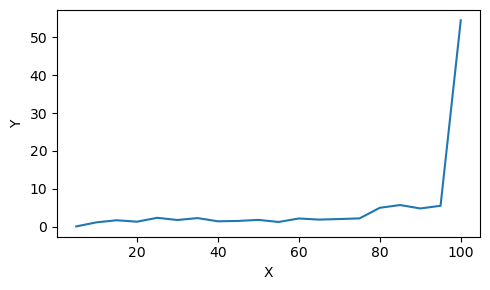

+ Total scammer with >= 2 available tokens: 4002
+ Total included available tokens: 15381
+ 100% similarities:  1971(49.3%)
+ >= 80% similarities:  2821(70.49%)
+ Stats: 


,available_tokens,similarity
count,4002.000000,4002.000000
mean,3.843328,0.823875
std,6.407997,0.259696
min,2.000000,0.000000
25%,2.000000,0.758621
50%,2.000000,0.972973
75%,3.000000,1.000000
max,150.000000,1.000000


In [228]:
bins = create_bins(num=20)
x = bins_to_labels(bins)
cluster_lvl_uni_idv = pd.read_csv("data/cluster_similarity/univ2_individual_similarities.csv")
sim_vals = list(cluster_lvl_uni_idv.similarity.values * 100)
count_sim_vals = count_bins(sim_vals, bins)
y = to_percentage(count_sim_vals)
setting = MultiLineChart(x, [y], [""], "", "X", "Y")
ChartDrawer.multi_lines("img/new/idv_uni.png", setting)
one_hundred_count =  len(cluster_lvl_uni_idv[cluster_lvl_uni_idv["similarity"] == 1])
print(f"+ Total scammer with >= 2 available tokens:", len(cluster_lvl_uni_idv))
print(f"+ Total included available tokens:", cluster_lvl_uni_idv["available_tokens"].sum())
print("+ 100% similarities: ",f"{one_hundred_count}({round(one_hundred_count/ len(cluster_lvl_uni_idv),3) * 100}%)")
print("+ >= 80% similarities: ",f"{sum(count_sim_vals[-4:])}({round(sum(y[-4:]),3)}%)")
print("+ Stats: ")
display(cluster_lvl_uni_idv.describe())


##### **1.1.2 Intra similarity**

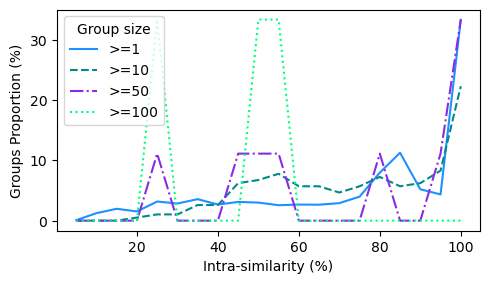

+ Total clusters: 4573
+ 100% similarities:  1410(30.8%)
+ >= 80% similarities:  2474(54.1%)
+ Stats: 


,group_id,scammers,available_tokens,similarity
count,4573.000000,4573.000000,4573.000000,4573.000000
mean,26168.542970,11.876667,5.557839,0.737026
std,20585.708259,587.653311,147.898710,0.274773
min,5.000000,1.000000,2.000000,0.000000
25%,9102.000000,2.000000,2.000000,0.533541
50%,21345.000000,2.000000,2.000000,0.826087
75%,39478.000000,3.000000,3.000000,1.000000
max,89950.000000,39741.000000,10000.000000,1.000000


In [229]:
cluster_lvl_uni_intra = pd.concat([pd.read_csv("data/cluster_similarity/univ2_intra_similarities.csv"), pd.read_csv("data/cluster_similarity/univ2_one_scammer_group_intra_similarities.csv")], axis=0)
cluster_lvl_uni_intra_setting = lines_with_lower_bound_build(cluster_lvl_uni_intra,"","Intra-similarity (%)", "Groups Proportion (%)", "ETH")
ChartDrawer.multi_lines("img/new/cluster_lvl_uni_intra.png",cluster_lvl_uni_intra_setting)
sim_vals = list(cluster_lvl_uni_intra.similarity.values * 100)
count_sim_vals = count_bins(sim_vals, bins)
y = to_percentage(count_sim_vals)
one_hundred_count = len(cluster_lvl_uni_intra[cluster_lvl_uni_intra["similarity"] == 1])
print(f"+ Total clusters:", len(cluster_lvl_uni_intra))
print("+ 100% similarities: ",f"{one_hundred_count}({round(one_hundred_count/ len(cluster_lvl_uni_intra),3) * 100}%)")
print("+ >= 80% similarities: ",f"{sum(count_sim_vals[-4:])}({round(sum(y[-4:]),3)}%)")
print("+ Stats: ")
display(cluster_lvl_uni_intra.describe())

##### **1.1.3 Inter similarity**

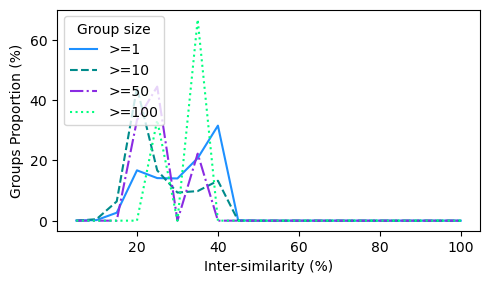

+ Total clusters: 61494
+ Stats: 


,group_id,scammers,available_tokens,groups,similarity
count,61494.000000,61494.000000,61494.000000,61494.000000,61494.000000
mean,45556.708736,1.837838,5674.858490,4820.953508,0.290022
std,26444.752717,160.261994,6677.724251,12.708492,0.079661
min,1.000000,1.000000,4765.000000,4765.000000,0.013640
25%,22684.250000,1.000000,4813.000000,4813.000000,0.224489
50%,45469.500000,1.000000,4822.000000,4821.000000,0.306238
75%,68506.750000,1.000000,4832.000000,4830.000000,0.359932
max,91458.000000,39741.000000,483500.000000,4871.000000,0.406596


In [230]:
cluster_lvl_uni_inter = pd.read_csv("data/cluster_similarity/univ2_inter_similarities.csv")
cluster_lvl_uni_inter_setting = lines_with_lower_bound_build(cluster_lvl_uni_inter,"","Inter-similarity (%)", "Groups Proportion (%)", "ETH")
ChartDrawer.multi_lines("img/new/cluster_lvl_uni_inter.png",cluster_lvl_uni_inter_setting)
sim_vals = list(cluster_lvl_uni_inter.similarity.values * 100)
count_sim_vals = count_bins(sim_vals, bins)
y = to_percentage(count_sim_vals)
one_hundred_count = len(cluster_lvl_uni_inter[cluster_lvl_uni_inter["similarity"] == 1])
print(f"+ Total clusters:", len(cluster_lvl_uni_inter))
print("+ Stats: ")
display(cluster_lvl_uni_inter.describe())

##### **1.2. Pancakeswap**

##### **1.2.1 Individual similarity**

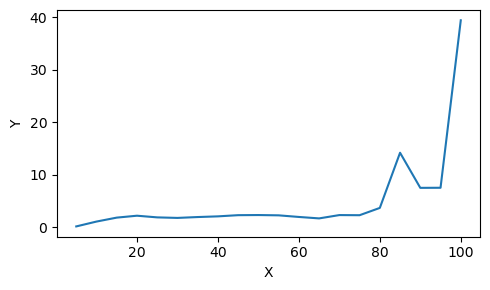

+ Total scammer with >= 2 available tokens: 28365
+ Total included available tokens: 137972
+ 100% similarities:  10236(36.1%)
+ >= 80% similarities:  19435(68.518%)
+ Stats: 


,available_tokens,similarity
count,28365.000000,28365.000000
mean,4.864164,0.789044
std,27.572267,0.261401
min,2.000000,0.000000
25%,2.000000,0.684848
50%,2.000000,0.882353
75%,4.000000,1.000000
max,2592.000000,1.000000


In [231]:
bins = create_bins(num=20)
x = bins_to_labels(bins)
cluster_lvl_pan_idv = pd.read_csv("data/cluster_similarity/panv2_individual_similarities.csv")
sim_vals = list(cluster_lvl_pan_idv.similarity.values * 100)
count_sim_vals = count_bins(sim_vals, bins)
y = to_percentage(count_sim_vals)
setting = MultiLineChart(x, [y], [""], "", "X", "Y")
ChartDrawer.multi_lines("img/new/idv_pan.png", setting)
one_hundred_count =  len(cluster_lvl_pan_idv[cluster_lvl_pan_idv["similarity"] == 1])
print(f"+ Total scammer with >= 2 available tokens:", len(cluster_lvl_pan_idv))
print(f"+ Total included available tokens:", cluster_lvl_pan_idv["available_tokens"].sum())
print("+ 100% similarities: ",f"{one_hundred_count}({round(one_hundred_count/ len(cluster_lvl_pan_idv),3) * 100}%)")
print("+ >= 80% similarities: ",f"{sum(count_sim_vals[-4:])}({round(sum(y[-4:]),3)}%)")
print("+ Stats: ")
display(cluster_lvl_pan_idv.describe())


##### **1.2.2 Intra similarity**

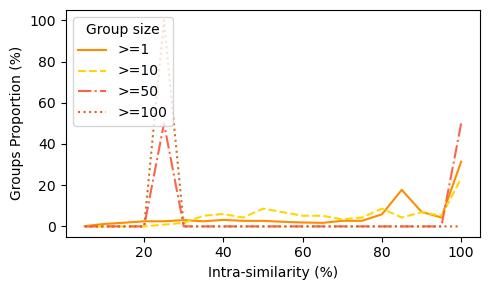

+ Total clusters: 10533
+ 100% similarities:  3058(28.999999999999996%)
+ >= 80% similarities:  6382(60.591%)
+ Stats: 


,group_id,scammers,available_tokens,similarity
count,10533.000000,10533.000000,10533.000000,10533.000000
mean,28828.046710,14.146682,4.086870,0.745507
std,21475.225383,1239.458022,97.451843,0.272121
min,2.000000,1.000000,2.000000,0.000000
25%,10619.000000,1.000000,2.000000,0.562107
50%,24414.000000,2.000000,2.000000,0.826087
75%,43512.000000,2.000000,3.000000,1.000000
max,92612.000000,127208.000000,10000.000000,1.000000


In [232]:
cluster_lvl_pan_intra = pd.concat([pd.read_csv("data/cluster_similarity/panv2_intra_similarities.csv"), pd.read_csv("data/cluster_similarity/panv2_one_scammer_group_intra_similarities.csv")], axis=0)
ccluster_lvl_pan_intra_setting = lines_with_lower_bound_build(cluster_lvl_pan_intra,"","Intra-similarity (%)", "Groups Proportion (%)", "BNB")
ChartDrawer.multi_lines("img/new/cluster_lvl_pan_intra.png",ccluster_lvl_pan_intra_setting)
sim_vals = list(cluster_lvl_pan_intra.similarity.values * 100)
count_sim_vals = count_bins(sim_vals, bins)
y = to_percentage(count_sim_vals)
one_hundred_count = len(cluster_lvl_pan_intra[cluster_lvl_pan_intra["similarity"] == 1])
print(f"+ Total clusters:", len(cluster_lvl_pan_intra))
print("+ 100% similarities: ",f"{one_hundred_count}({round(one_hundred_count/ len(cluster_lvl_pan_intra),3) * 100}%)")
print("+ >= 80% similarities: ",f"{sum(count_sim_vals[-4:])}({round(sum(y[-4:]),3)}%)")
print("+ Stats: ")
display(cluster_lvl_pan_intra.describe())

##### **1.2.3 Inter similarity**

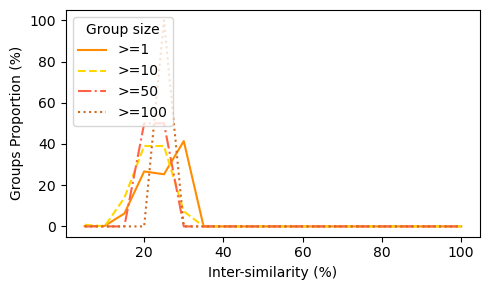

+ Total clusters: 74908
+ Stats: 


,group_id,scammers,available_tokens,groups,similarity
count,74908.000000,74908.000000,74908.000000,74908.000000,74908.000000
mean,47069.563718,2.874513,6317.344276,4852.502283,0.224497
std,26920.962008,464.779538,6729.110471,11.667320,0.045566
min,2.000000,1.000000,4802.000000,4802.000000,0.005196
25%,23800.750000,1.000000,4846.000000,4845.000000,0.182473
50%,47230.000000,1.000000,4855.000000,4853.000000,0.238007
75%,70387.250000,1.000000,4866.000000,4860.000000,0.263810
max,93420.000000,127208.000000,485400.000000,4902.000000,0.292658


In [233]:
cluster_lvl_pan_inter = pd.read_csv("data/cluster_similarity/panv2_inter_similarities.csv")
cluster_lvl_pan_inter_setting = lines_with_lower_bound_build(cluster_lvl_pan_inter,"","Inter-similarity (%)", "Groups Proportion (%)", "BNB")
ChartDrawer.multi_lines("img/new/cluster_lvl_pan_inter.png",cluster_lvl_pan_inter_setting)
sim_vals = list(cluster_lvl_pan_inter.similarity.values * 100)
count_sim_vals = count_bins(sim_vals, bins)
y = to_percentage(count_sim_vals)
one_hundred_count = len(cluster_lvl_pan_inter[cluster_lvl_pan_inter["similarity"] == 1])
print(f"+ Total clusters:", len(cluster_lvl_pan_inter))
print("+ Stats: ")
display(cluster_lvl_pan_inter.describe())

#### **1. Pattern Level Similarity**
##### **1.1. Uniswap**

In [234]:
def show_pattern_similarity(dex='univ2', type='intra', pattern='simple_chain'):
    print(f"======================={dex.upper()} {pattern.upper()} PATTERN {type.upper()} SIMILARITY =======================")
    data = pd.read_csv(f"data/pattern_similarity/{dex}_{pattern}_{type}_similarities.csv")
    setting = lines_with_lower_bound_build(data,"","Intra-similarity (%)", "Groups Proportion (%)", "ETH" if dex == 'univ2' else "BNB")
    ChartDrawer.multi_lines(f"img/new/{dex}_{pattern}_{type}.png",setting)
    print(f"+ Total clusters:", len(data))
    if type == 'intra':
        sim_vals = list(data.similarity.values * 100)
        count_sim_vals = count_bins(sim_vals, bins)
        y = to_percentage(count_sim_vals)
        one_hundred_count = len(data[data["similarity"] == 1])
        print("+ 100% similarities: ",f"{one_hundred_count}({round(one_hundred_count/ len(cluster_lvl_pan_intra),3) * 100}%)")
        print("+ >= 80% similarities: ",f"{sum(count_sim_vals[-4:])}({round(sum(y[-4:]),3)}%)")
    print("+ Stats: ")
    display(data.describe())


##### **1.1.1. INTRA SIMILARITY**

=======================UNIV2 SIMPLE_CHAIN PATTERN INTRA SIMILARITY =======================


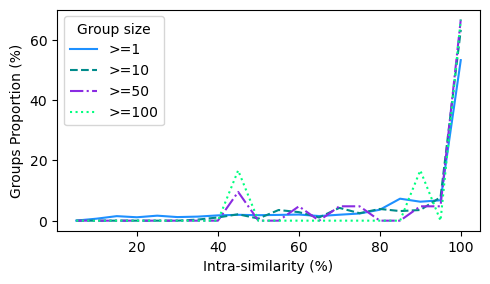

+ Total clusters: 3198
+ 100% similarities:  1569(14.899999999999999%)
+ >= 80% similarities:  2352(73.546%)
+ Stats: 


,group_id,scammers,available_tokens,similarity
count,3198.000000,3198.000000,3198.000000,3198.000000
mean,2189.060663,4.875235,5.564103,0.838108
std,1294.361411,9.939498,12.692267,0.241348
min,0.000000,2.000000,2.000000,0.000000
25%,1066.250000,2.000000,2.000000,0.784785
50%,2182.500000,2.000000,3.000000,0.969052
75%,3282.500000,4.000000,5.000000,1.000000
max,4493.000000,274.000000,338.000000,1.000000


=======================UNIV2 IN_STAR PATTERN INTRA SIMILARITY =======================


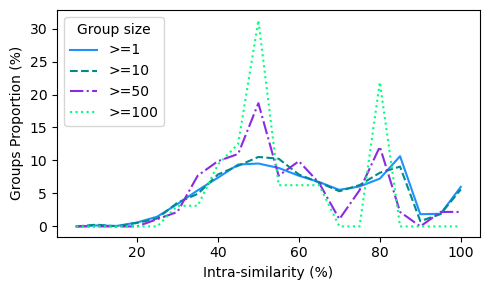

+ Total clusters: 1353
+ 100% similarities:  63(0.6%)
+ >= 80% similarities:  276(20.399%)
+ Stats: 


,group_id,scammers,available_tokens,similarity
count,1353.000000,1353.000000,1353.000000,1353.000000
mean,778.172210,20.650407,15.251293,0.596405
std,454.664128,38.087854,26.689905,0.204141
min,0.000000,6.000000,2.000000,0.076923
25%,388.000000,7.000000,5.000000,0.433653
50%,780.000000,10.000000,8.000000,0.576484
75%,1166.000000,20.000000,15.000000,0.768468
max,1573.000000,586.000000,551.000000,1.000000


=======================UNIV2 OUT_STAR PATTERN INTRA SIMILARITY =======================


/tmp/ipykernel_1092616/3427011158.py:22: RuntimeWarning: invalid value encountered in divide
  return x / sum * 100


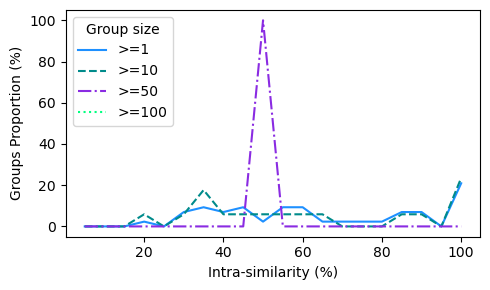

+ Total clusters: 43
+ 100% similarities:  9(0.1%)
+ >= 80% similarities:  15(34.884%)
+ Stats: 


,group_id,scammers,available_tokens,similarity
count,43.000000,43.000000,43.000000,43.000000
mean,27.581395,10.651163,8.441860,0.626195
std,17.520373,9.744067,7.048479,0.264384
min,0.000000,6.000000,2.000000,0.182981
25%,13.500000,6.000000,5.000000,0.399207
50%,27.000000,8.000000,6.000000,0.586728
75%,40.500000,11.500000,9.500000,0.857288
max,59.000000,67.000000,44.000000,1.000000


=======================UNIV2 IN_OUT_STAR PATTERN INTRA SIMILARITY =======================


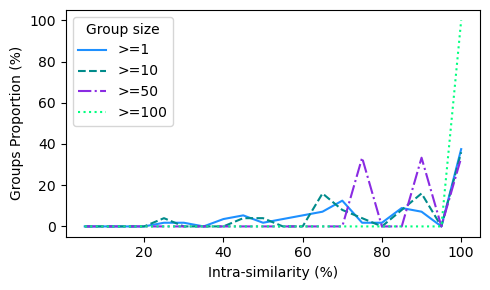

+ Total clusters: 56
+ 100% similarities:  19(0.2%)
+ >= 80% similarities:  30(53.571%)
+ Stats: 


,group_id,scammers,available_tokens,similarity
count,56.000000,56.0000,56.000000,56.000000
mean,33.375000,17.6250,14.732143,0.766638
std,20.054075,26.3822,23.315614,0.226939
min,0.000000,6.0000,2.000000,0.224138
25%,16.500000,7.0000,6.000000,0.602135
50%,32.500000,8.5000,8.500000,0.813393
75%,49.250000,14.2500,15.000000,1.000000
max,71.000000,160.0000,164.000000,1.000000


=======================UNIV2 MSF PATTERN INTRA SIMILARITY =======================


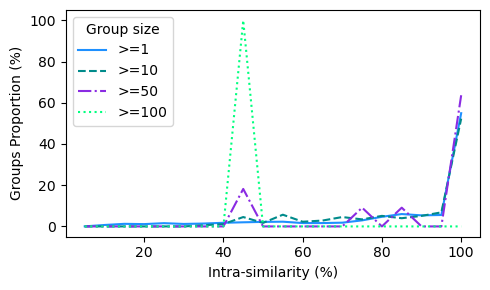

+ Total clusters: 3750
+ 100% similarities:  1917(18.2%)
+ >= 80% similarities:  2694(71.84%)
+ Stats: 


,group_id,scammers,available_tokens,similarity
count,3750.000000,3750.000000,3750.000000,3750.000000
mean,2598.113867,3.715200,4.550933,0.838361
std,1527.715187,5.557955,10.220897,0.241207
min,0.000000,2.000000,2.000000,0.000000
25%,1269.250000,2.000000,2.000000,0.771775
50%,2569.500000,2.000000,2.000000,1.000000
75%,3899.750000,3.000000,4.000000,1.000000
max,5297.000000,156.000000,338.000000,1.000000


In [235]:
show_pattern_similarity("univ2", "intra", "simple_chain")
show_pattern_similarity("univ2", "intra", "in_star")
show_pattern_similarity("univ2", "intra", "out_star")
show_pattern_similarity("univ2", "intra", "in_out_star")
show_pattern_similarity("univ2", "intra", "MSF")

##### **1.1.2. INTER SIMILARITY**

=======================UNIV2 SIMPLE_CHAIN PATTERN INTER SIMILARITY =======================


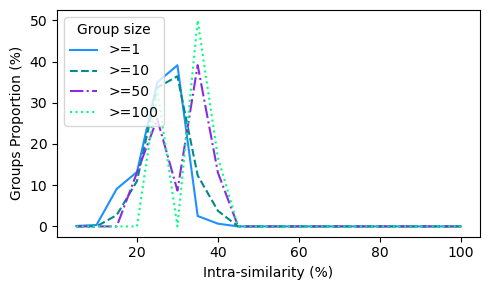

+ Total clusters: 3478
+ Stats: 


,group_id,scammers,available_tokens,groups,similarity
count,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000
mean,2217.822024,4.730305,13607.696665,2740.850489,0.232541
std,1302.219887,9.684631,23488.581231,17.446828,0.050179
min,0.000000,2.000000,2703.000000,2667.000000,0.028951
25%,1090.500000,2.000000,5474.000000,2729.000000,0.206806
50%,2207.500000,2.000000,5556.000000,2741.000000,0.237147
75%,3338.250000,4.000000,11064.000000,2753.000000,0.268215
max,4493.000000,274.000000,278200.000000,2799.000000,0.360088


=======================UNIV2 IN_STAR PATTERN INTER SIMILARITY =======================


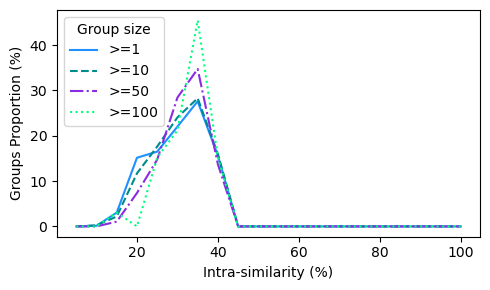

+ Total clusters: 1413
+ Stats: 


,group_id,scammers,available_tokens,groups,similarity
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,777.125973,20.552725,19084.815994,1395.246992,0.276759
std,454.655563,37.572549,24546.594520,3.964860,0.069407
min,0.000000,6.000000,1385.000000,1380.000000,0.098284
25%,386.000000,7.000000,6975.000000,1393.000000,0.224529
50%,777.000000,10.000000,9821.000000,1395.000000,0.286198
75%,1166.000000,20.000000,20850.000000,1398.000000,0.332881
max,1573.000000,586.000000,140400.000000,1405.000000,0.390742


=======================UNIV2 OUT_STAR PATTERN INTER SIMILARITY =======================


/tmp/ipykernel_1092616/3427011158.py:22: RuntimeWarning: invalid value encountered in divide
  return x / sum * 100


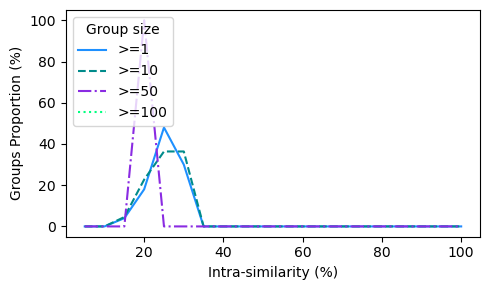

+ Total clusters: 50
+ Stats: 


,group_id,scammers,available_tokens,groups,similarity
count,50.000000,50.000000,50.000000,50.0,50.000000
mean,27.860000,10.620000,370.000000,50.0,0.226169
std,17.065313,9.052883,351.382111,0.0,0.037983
min,0.000000,6.000000,50.000000,50.0,0.109057
25%,14.250000,6.000000,200.000000,50.0,0.203192
50%,27.500000,8.000000,300.000000,50.0,0.227257
75%,40.750000,11.750000,450.000000,50.0,0.256377
max,59.000000,67.000000,2200.000000,50.0,0.293805


=======================UNIV2 IN_OUT_STAR PATTERN INTER SIMILARITY =======================


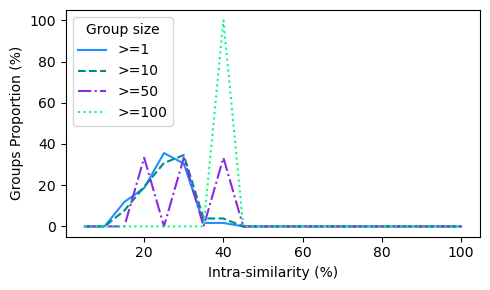

+ Total clusters: 59
+ Stats: 


,group_id,scammers,available_tokens,groups,similarity
count,59.000000,59.000000,59.000000,59.0,59.000000
mean,33.745763,17.101695,764.000000,59.0,0.223752
std,20.512060,25.795412,957.222058,0.0,0.052300
min,0.000000,6.000000,59.000000,59.0,0.113299
25%,16.000000,7.000000,324.500000,59.0,0.186604
50%,33.000000,8.000000,472.000000,59.0,0.230062
75%,50.500000,13.500000,855.500000,59.0,0.268717
max,71.000000,160.000000,5900.000000,59.0,0.356352


=======================UNIV2 MSF PATTERN INTER SIMILARITY =======================


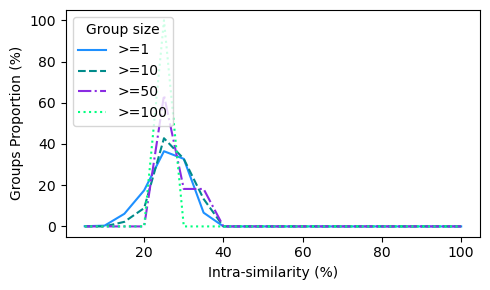

+ Total clusters: 4101
+ Stats: 


,group_id,scammers,available_tokens,groups,similarity
count,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000
mean,2625.728359,3.603024,12286.594733,2983.745672,0.230793
std,1525.615421,5.339081,20589.316653,19.486992,0.048982
min,0.000000,2.000000,2927.000000,2912.000000,0.028974
25%,1303.000000,2.000000,5952.000000,2971.000000,0.201362
50%,2608.000000,2.000000,6018.000000,2984.000000,0.233725
75%,3925.000000,3.000000,11896.000000,2997.000000,0.265552
max,5297.000000,156.000000,301000.000000,3049.000000,0.335115


In [236]:
show_pattern_similarity("univ2", "inter", "simple_chain")
show_pattern_similarity("univ2", "inter", "in_star")
show_pattern_similarity("univ2", "inter", "out_star")
show_pattern_similarity("univ2", "inter", "in_out_star")
show_pattern_similarity("univ2", "inter", "MSF")